# 霍夫变换  

✔️ 霍夫变换常用来在图像中提取直线和圆等几何形状

✔️ 直线的表达方式：

## 1.1 霍夫直线检测

`lines = cv2.HoughLines(image, rho, theta, threshold)`
- image：输入 8 位灰度图像；
- rho：生成极坐标时像素扫描步长，值越大，考虑越多的线；
- theta：生成极坐标时候的角度步长，值越小，考虑越多的线；
- threshold：阈值，值越小，考虑越多的线




In [11]:
import warnings
warnings.filterwarnings("ignore") 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9,9) 
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)  

#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

Len of lines: 29


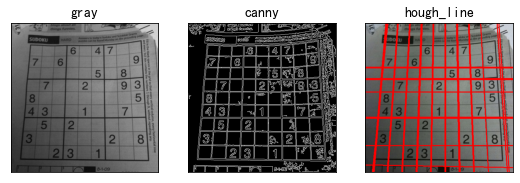

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('./images/sudoku.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# edges = cv2.Canny(gray,50,150,apertureSize = 3)
edges = cv2.Canny(gray, 10, 50, apertureSize=3)

lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)
print("Len of lines:", len(lines))
# print lines

for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    hough_line = cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

titles = [ "gray","canny","hough_line"]
images = [gray,edges,hough_line ] 

for i in range(3):
    plt.subplot(1, 3, i + 1),plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()  


## 1.2 概率Hough变换

- 标准霍夫变换需要遍历每个点，无论是耗时还是计算量都相对较大，而且它得到的是整一条线（r 和 θ），并不知道原图中直线的端点。 

- 提出了统计概率霍夫直线变换(Probabilistic Hough Transform)，是一种改进的霍夫变换，它采取一种概率挑选机制，不是所有的点都进行计算，而是随机的选取一些点来进行计算，这样的话在阈值设置上也需要降低一些


Len of lines: 185


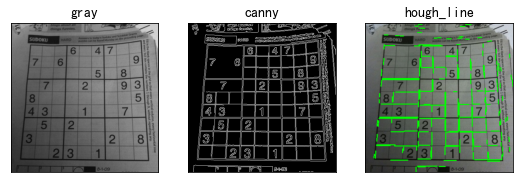

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('./images/sudoku.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

minLineLength = 100
maxLineGap = 10

lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength, maxLineGap)
print("Len of lines:", len(lines))

for line in lines:
    x1, y1, x2, y2 = line[0]
    hough_line = cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

titles = [ "gray","canny","hough_line"]
images = [gray,edges,hough_line ] 

for i in range(3):
    plt.subplot(1, 3, i + 1),plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()  


## 1.3 霍夫圆变换  

类似于直线变换，只不过线是用(r,θ)表示，圆是用(x_center,y_center,r)来表示，从二维变成了三维，数据量变大了很多，所以一般使用霍夫梯度法减少计算量。

`cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, 35, param2=50)`

参数1：要检测的二值图（一般是阈值分割或边缘检测后的图）
参数2：变换方法，一般使用霍夫梯度法，cv2.HOUGH_GRADIENT
参数3：dp=1：表示霍夫梯度法中累加器图像的分辨率与原图一致
参数4：两个不同圆圆心的最短距离
参数5：param2跟霍夫直线变换中的累加数阈值一样
    

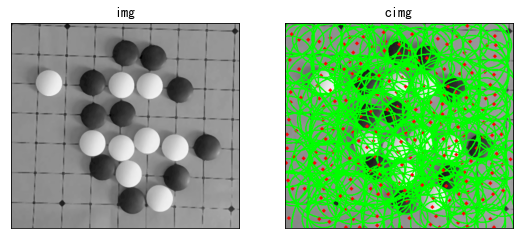

In [20]:

img = cv2.imread('./images/OpenCV_Logo_with_text.png', 0)
img = cv2.medianBlur(img, 5)
cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=0, maxRadius=0)

circles = np.uint16(np.around(circles))

for i in circles[0, :]:
    # draw the outer circle
    cv2.circle(cimg, (i[0], i[1]), i[2], (0, 255, 0), 2)
    # draw the center of the circle
    cv2.circle(cimg, (i[0], i[1]), 2, (0, 0, 255), 3) 
    
titles = [ "img","cimg"]
images = [img,cimg ] 

for i in range(2):
    plt.subplot(1, 2, i + 1),plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()  